# COGS 108 - EDA Checkpoint

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat

# Data Cleaning

Describe your data cleaning steps here.

In [15]:
income_raw = pd.read_csv("Datasets/IncomeByCounty.csv")
vaccine_count_cal = pd.read_csv("Datasets/DosesAdminsteredbyCounty(California).csv", thousands=',')
vaccine_count_wash = pd.read_csv("Datasets/Doses(Washington).csv", thousands=',')

group = income_raw.groupby("LineCode")

counties = group.get_group(1)["GeoName"].reset_index()
del counties["index"]


income_data = group.get_group(1)["2019"].reset_index()
del income_data["index"]

population_data = group.get_group(2)["2019"].reset_index()
del population_data["index"]

county_data = pd.DataFrame(counties)
county_data = county_data.rename(columns={"GeoName": "County"})

county_data["Total Income"] = income_data
county_data["Population"] = population_data


#Remove NA from Dataset for accurate int datatype
county_data = county_data.replace("(NA)", "1")
#Convert object data to int
county_data["Total Income"] = pd.to_numeric(county_data["Total Income"])
county_data["Population"] = pd.to_numeric(county_data["Population"])


#Calculate Income per Capita
percapitaincome = county_data.apply(lambda row: row["Total Income"] / row["Population"], axis = 1).reset_index()
del percapitaincome["index"]
county_data["Income per Capita"] = percapitaincome
county_data.to_csv("CleanedIncomePerCapita.csv")

#Seperate County and State
count_state_temp = county_data["County"].str.split(", ", n = 1, expand = True) 
county_data.drop(columns =["County"], inplace = True) 

county_data["County"] = count_state_temp[0]
county_data["State"] = count_state_temp[1]

#filter only california counties
cal_income = county_data[(county_data.State == "CA")]

#filter only washington counties
wash_income = county_data[(county_data.State == "WA")]

merged_cal = cal_income.merge(vaccine_count_cal, "inner", "County")
vaccine_per_capita = merged_cal.apply(lambda row: row["Doses Administered"] / row["Population"], axis = 1)
merged_cal["Doses per Capita"] = vaccine_per_capita
merged_cal.info()
merged_cal.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 7 columns):
Total Income          58 non-null int64
Population            58 non-null int64
Income per Capita     58 non-null float64
County                58 non-null object
State                 58 non-null object
Doses Administered    58 non-null int64
Doses per Capita      58 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.6+ KB


,Total Income,Population,Income per Capita,County,State,Doses Administered,Doses per Capita
0,135663560,1671329,81.171068,Alameda,CA,216440,0.129502
1,81463,1129,72.155004,Alpine,CA,362,0.320638
2,1825410,39752,45.919954,Amador,CA,4777,0.120170
3,10490209,219186,47.859850,Butte,CA,39012,0.177986
4,2347168,45905,51.130988,Calaveras,CA,5568,0.121294


In [14]:
merged_wash = wash_income.merge(vaccine_count_wash, "inner", "County")
merged_wash = merged_wash.rename(columns = {"Vaccine Doses Given": "Doses Administered"})
vaccine_per_capita = merged_wash.apply(lambda row: row["Doses Administered"] / row["Population"], axis = 1)
merged_wash["Doses per Capita"] = vaccine_per_capita
merged_wash.info()
merged_wash.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 9 columns):
Total Income                     39 non-null int64
Population                       39 non-null int64
Income per Capita                39 non-null float64
County                           39 non-null object
State                            39 non-null object
Doses Administered               39 non-null int64
People Initiating Vaccination    39 non-null int64
People Fully Vaccinated          39 non-null int64
Doses per Capita                 39 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 3.0+ KB


,Total Income,Population,Income per Capita,County,State,Doses Administered,People Initiating Vaccination,People Fully Vaccinated,Doses per Capita
0,867839,19983,43.428865,Adams,WA,3375,2097,685,0.168894
1,1094225,22582,48.455628,Asotin,WA,4808,2625,978,0.212913
2,10087552,204390,49.354430,Benton,WA,41142,24261,7685,0.201292
3,4342733,77200,56.253018,Chelan,WA,31552,15869,6052,0.408705
4,3700741,77331,47.855853,Clallam,WA,30843,20215,10663,0.398844


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

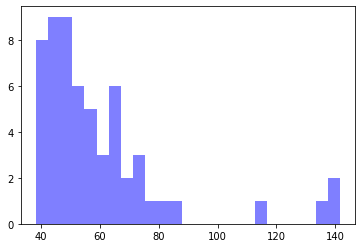

In [5]:
#histogram of california income per capita
num_bins = 25
n_cal, bins_cal, patches_cal = plt.hist(merged_cal["Income per Capita"], num_bins, facecolor='blue', alpha=0.5)

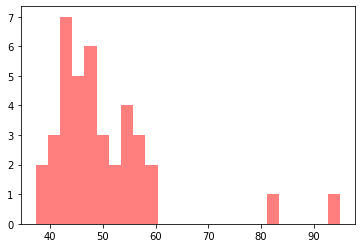

In [6]:
n_wash, bins_wash, patches_wash = plt.hist(merged_wash["Income per Capita"], num_bins, facecolor='red', alpha=0.5)

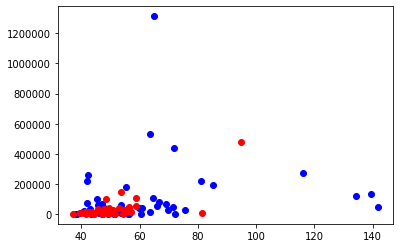

In [13]:
fig, axs = plt.subplots()
axs.plot(merged_cal["Income per Capita"], merged_cal["Doses Administered"], "bo")
axs.plot(merged_wash["Income per Capita"], merged_wash["Doses Administered"], "ro")

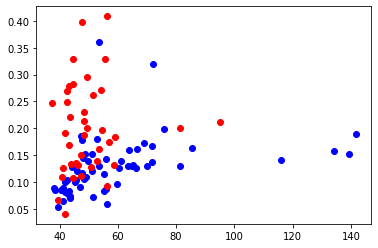

In [16]:
fig2, axs2 = plt.subplots()
axs2.plot(merged_cal["Income per Capita"], merged_cal["Doses per Capita"], "bo")
axs2.plot(merged_wash["Income per Capita"], merged_wash["Doses per Capita"], "ro")